# The goal of project is to predict sample's 2014 credit according 2013 information, and then compare with default credit. Finally calculate the scorecard.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("/Users/yaqinhei/Downloads/CreditCardDefaultForecast.csv")

In [4]:
df.head()

,Account_Number,Default,Limit,Annual_Income,Month_On_Book,Gender_Code,Age_By_2013,Education_Code,Industry_code,OS_201312,...,Payment_201309,OS_201308,DUE_201308,Payment_201308,OS_201307,DUE_201307,Payment_201307,OS_201306,DUE_201306,Payment_201306
0,820000011,0,5000,30000,147,M,39,NaN,4.0,4769.19,...,700.00,4889.00,1,200.00,4804.63,1,240.00,4782.88,1,405.00
1,820000046,0,5000,30000,147,F,59,NaN,4.0,343.51,...,300.00,106.94,0,1820.00,3427.26,0,1300.00,-7.56,0,1000.00
2,820000054,0,5000,30000,147,F,36,NaN,4.0,-0.01,...,321.45,-0.01,0,321.45,-0.01,0,321.45,-0.01,0,321.45
3,820000062,0,5000,30000,147,M,38,NaN,4.0,-4.72,...,860.00,-4.72,0,860.00,-4.72,0,860.00,-4.72,0,860.00
4,820000089,0,5000,30000,147,F,57,NaN,4.0,0.00,...,4.05,0.00,0,4.05,0.00,0,4.05,0.00,0,4.05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Number  1000 non-null   int64  
 1   Default         1000 non-null   int64  
 2   Limit           1000 non-null   int64  
 3   Annual_Income   1000 non-null   int64  
 4   Month_On_Book   1000 non-null   int64  
 5   Gender_Code     1000 non-null   object 
 6   Age_By_2013     1000 non-null   int64  
 7   Education_Code  166 non-null    float64
 8   Industry_code   989 non-null    float64
 9   OS_201312       1000 non-null   float64
 10  DUE_201312      1000 non-null   int64  
 11  Payment_201312  1000 non-null   float64
 12  OS_201311       1000 non-null   float64
 13  DUE_201311      1000 non-null   int64  
 14  Payment_201311  1000 non-null   float64
 15  OS_201310       1000 non-null   float64
 16  DUE_201310      1000 non-null   int64  
 17  Payment_201310  1000 non-null   fl

In [5]:
df.describe()

,Account_Number,Default,Limit,Annual_Income,Month_On_Book,Age_By_2013,Education_Code,Industry_code,OS_201312,DUE_201312,...,Payment_201309,OS_201308,DUE_201308,Payment_201308,OS_201307,DUE_201307,Payment_201307,OS_201306,DUE_201306,Payment_201306
count,1.000000e+03,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000,166.000000,989.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.200296e+08,0.10000,11227.000000,7.002719e+04,145.947000,46.626000,8.228916,17.237614,4061.497690,0.447000,...,1581.047770,4020.573920,0.379000,1740.649040,3884.317200,0.380000,1675.287450,4030.244420,0.416000,1619.730790
std,6.088140e+04,0.30015,10482.621636,6.403540e+04,0.755488,6.462808,4.643210,8.726800,7839.986061,0.709715,...,4395.876909,7396.924587,0.579392,5408.747207,7006.564627,0.603294,4744.071334,7245.036458,0.585907,4775.807626
min,8.200000e+08,0.00000,2000.000000,2.520000e+04,142.000000,35.000000,0.000000,1.000000,-24000.620000,0.000000,...,0.000000,-10015.000000,0.000000,0.000000,-9280.380000,0.000000,0.000000,-8750.000000,0.000000,0.000000
25%,8.200068e+08,0.00000,6000.000000,3.813600e+04,146.000000,42.000000,8.000000,11.000000,0.000000,0.000000,...,100.000000,0.000000,0.000000,95.947500,0.000000,0.000000,100.000000,0.000000,0.000000,75.772500
50%,8.200137e+08,0.00000,8000.000000,5.219400e+04,146.000000,46.000000,11.000000,19.000000,204.425000,0.000000,...,280.000000,220.330000,0.000000,282.500000,222.865000,0.000000,264.400000,151.340000,0.000000,250.000000
75%,8.200213e+08,0.00000,12000.000000,7.800000e+04,146.000000,51.000000,11.000000,20.000000,5873.190000,1.000000,...,1000.000000,5785.655000,1.000000,1000.000000,5757.282500,1.000000,1000.000000,5848.725000,1.000000,1000.000000
max,8.203763e+08,1.00000,122500.000000,1.061856e+06,147.000000,72.000000,11.000000,35.000000,104349.890000,4.000000,...,52179.120000,83724.190000,4.000000,100000.000000,85890.650000,4.000000,52179.120000,82580.910000,3.000000,52179.120000


# First step obeserve data.

In [6]:
table = df.pivot_table(['Month_On_Book','OS_201312','OS_201311','OS_201310','OS_201309','DUE_201308','DUE_201307','OS_201306',],
                                   index=['Default'],
                                   aggfunc=np.sum)
table

,DUE_201307,DUE_201308,Month_On_Book,OS_201306,OS_201309,OS_201310,OS_201311,OS_201312
Default,,,,,,,,
0,268,280,131530,3237843.43,3298491.28,3271822.84,3303163.91,3251029.13
1,112,99,14417,792400.99,759684.85,789229.66,813339.78,810468.56


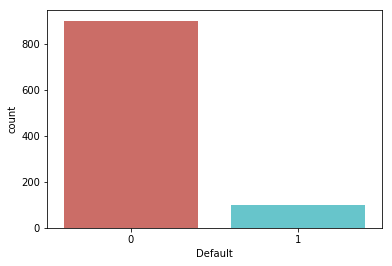

<Figure size 432x288 with 0 Axes>

In [7]:
sns.countplot(x ='Default', data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot')

# Second, calculate and add measures.

In [8]:
detail = pd.DataFrame(df, columns = ['Account_Number','Default','Annual_Income', 'Month_On_Book', 'Age_By_2013', 'Education_Code', 'Industry_code'])

In [9]:
detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Number  1000 non-null   int64  
 1   Default         1000 non-null   int64  
 2   Annual_Income   1000 non-null   int64  
 3   Month_On_Book   1000 non-null   int64  
 4   Age_By_2013     1000 non-null   int64  
 5   Education_Code  166 non-null    float64
 6   Industry_code   989 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


# Bin variables follow the the most frequency level and reduce level to 2 or 3.

In [10]:
# 1 information details

for col_name in detail.columns:
    if detail[col_name].dtypes == 'object':
        unique_cat = len(detail[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name = col_name, unique_cat = unique_cat))

In [11]:
 print(detail['Industry_code'].value_counts().sort_values(ascending = False).head(10))

19.0    272
30.0    133
17.0    111
5.0     103
11.0     75
4.0      54
34.0     30
12.0     28
20.0     23
2.0      20
Name: Industry_code, dtype: int64


In [12]:
print(detail['Education_Code'].value_counts().sort_values(ascending = False).head(10))

11.0    115
0.0      38
10.0      6
8.0       4
3.0       3
Name: Education_Code, dtype: int64


In [13]:
detail['Education_Code'] = ['hanshou' if detail == 11 else 'others' for detail in detail['Education_Code']]

print(detail['Education_Code'].value_counts().sort_values(ascending = False))

others     885
hanshou    115
Name: Education_Code, dtype: int64


In [14]:
detail['Industry_code'] = ['public' if detail == 4 or detail == 11 else 'other' for detail in detail['Industry_code']]

print(detail['Industry_code'].value_counts().sort_values(ascending = False))

other     871
public    129
Name: Industry_code, dtype: int64


In [15]:
detail['Annual_Income_Bins'] = pd.qcut(detail['Annual_Income'], 3, 
                                   labels=['Income_5k', 'Income_10k','Income_15k'])

In [16]:
detail['Age_By_2013_Bins'] = pd.qcut(detail['Age_By_2013'], 3, 
                                   labels=['age_to_46', 'age_to_51','age_above51'])

In [17]:
detail['Month_On_Book_Bins'] = pd.qcut(detail['Month_On_Book'], 2, 
                                   labels=['book_to_145','book_after_145'])

In [18]:
da = pd.DataFrame(detail, columns = ['Account_Number','Age_By_2013_Bins','Annual_Income_Bins', 'Month_On_Book_Bins'])

In [19]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Account_Number      1000 non-null   int64   
 1   Age_By_2013_Bins    1000 non-null   category
 2   Annual_Income_Bins  1000 non-null   category
 3   Month_On_Book_Bins  1000 non-null   category
dtypes: category(3), int64(1)
memory usage: 11.2 KB


# Consider the times of overdue Last 6 months and the max overdue for last 3 months.

In [20]:
# due days analysis (1000 rows)

In [21]:
due = pd.DataFrame(df, columns = ['Account_Number','DUE_201306','DUE_201307','DUE_201308','DUE_201309','DUE_201310','DUE_201311','DUE_201312'])

In [22]:
col = due.loc[: , "DUE_201306":"DUE_201312"]
due['due_count'] = (col>0).sum(axis = 1)

In [23]:
col = due.loc[: , "DUE_201310":"DUE_201312"]
due['max_recent'] = col.max(axis = 1)

In [24]:
due1 = pd.DataFrame(due, columns= ['Account_Number','due_count', 'max_recent'])
due1

,Account_Number,due_count,max_recent
0,820000011,7,1
1,820000046,0,0
2,820000054,0,0
3,820000062,0,0
4,820000089,0,0
...,...,...,...
995,820361391,6,2
996,820363998,5,1
997,820365133,7,1
998,820372130,6,2


# Limit Utilization = Outstanding /Limit rate 

In [25]:
creur = pd.DataFrame(df, columns = ['Account_Number','Gender_Code','OS_201306','OS_201307','OS_201308','OS_201309','OS_201310','OS_201311','OS_201312'])

In [26]:
creur['Limit'] = df.Limit 

In [27]:
creur = creur[creur['Limit']>0] 

In [28]:
col = creur.loc[: , "OS_201306":"OS_201312"]
creur['ur_mean'] = col.mean(axis=1)
creur['ur_mean'] = creur['ur_mean']/creur.Limit

In [29]:
creur['ur_max'] = col.max(axis=1)
creur['ur_max'] = creur['ur_max']/creur.Limit

In [30]:
creur['ur_min'] = col.min(axis=1)
creur['ur_min'] = creur['ur_min']/creur.Limit

In [31]:
creur['ur_mean'] = np.where(creur.ur_mean <= 0, 0, creur.ur_mean)
creur['ur_min'] = np.where(creur.ur_min <= 0, 0, creur.ur_min)
creur['ur_max'] = np.where(creur.ur_max <= 0, 0, creur.ur_max)

In [32]:
print(creur)

     Account_Number Gender_Code  OS_201306  OS_201307  OS_201308  OS_201309  \
0         820000011           M    4782.88    4804.63    4889.00    4640.36   
1         820000046           F      -7.56    3427.26     106.94     704.81   
2         820000054           F      -0.01      -0.01      -0.01      -0.01   
3         820000062           M      -4.72      -4.72      -4.72      -4.72   
4         820000089           F       0.00       0.00       0.00       0.00   
..              ...         ...        ...        ...        ...        ...   
995       820361391           M    5981.50    6049.13    5980.09    5967.94   
996       820363998           M    4793.98    5747.07    5786.45    5695.93   
997       820365133           F   49810.96    7103.77    8680.90   10781.20   
998       820372130           F    5158.27    5025.60    5127.04    5361.23   
999       820376305           M    6039.79    6170.03    6102.76    6226.08   

     OS_201310  OS_201311  OS_201312  Limit   ur_me

In [33]:
cre = pd. DataFrame(creur, columns = ['Account_Number','Gender_Code','ur_mean', 'ur_max', 'ur_min'])

In [34]:
cre.describe()

,Account_Number,ur_mean,ur_max,ur_min
count,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,8.200296e+08,0.383786,0.482466,0.296130
std,6.088140e+04,0.416238,0.455930,0.401284
min,8.200000e+08,0.000000,0.000000,0.000000
25%,8.200068e+08,0.000000,0.000000,0.000000
50%,8.200137e+08,0.134350,0.481572,0.000000
75%,8.200213e+08,0.868446,0.977880,0.766957
max,8.203763e+08,1.037999,1.082977,1.018140


# Create repayment rate varibles

In [35]:
part = pd.DataFrame()

In [36]:
df.head(5)

,Account_Number,Default,Limit,Annual_Income,Month_On_Book,Gender_Code,Age_By_2013,Education_Code,Industry_code,OS_201312,...,Payment_201309,OS_201308,DUE_201308,Payment_201308,OS_201307,DUE_201307,Payment_201307,OS_201306,DUE_201306,Payment_201306
0,820000011,0,5000,30000,147,M,39,NaN,4.0,4769.19,...,700.00,4889.00,1,200.00,4804.63,1,240.00,4782.88,1,405.00
1,820000046,0,5000,30000,147,F,59,NaN,4.0,343.51,...,300.00,106.94,0,1820.00,3427.26,0,1300.00,-7.56,0,1000.00
2,820000054,0,5000,30000,147,F,36,NaN,4.0,-0.01,...,321.45,-0.01,0,321.45,-0.01,0,321.45,-0.01,0,321.45
3,820000062,0,5000,30000,147,M,38,NaN,4.0,-4.72,...,860.00,-4.72,0,860.00,-4.72,0,860.00,-4.72,0,860.00
4,820000089,0,5000,30000,147,F,57,NaN,4.0,0.00,...,4.05,0.00,0,4.05,0.00,0,4.05,0.00,0,4.05


In [37]:
part= pd.DataFrame()
part['Account_Number'] = df.Account_Number

In [38]:
part['OS_201306'] = np.where(df.OS_201306 <= 0, df.Payment_201306, df.OS_201306 )
part['OS_201307'] = np.where(df.OS_201307 <= 0, df.Payment_201307, df.OS_201307 )
part['OS_201308'] = np.where(df.OS_201308 <= 0, df.Payment_201308, df.OS_201308 )
part['OS_201309'] = np.where(df.OS_201309 <= 0, df.Payment_201309, df.OS_201309 )
part['OS_201310'] = np.where(df.OS_201310 <= 0, df.Payment_201310, df.OS_201310 )
part['OS_201311'] = np.where(df.OS_201311 <= 0, df.Payment_201311, df.OS_201311 )
part['OS_201312'] = np.where(df.OS_201312 <= 0, df.Payment_201312, df.OS_201312 )

In [39]:
part['payradio06'] = df.Payment_201306 / part.OS_201306
part['payradio07'] = df.Payment_201307 / part.OS_201307
part['payradio08'] = df.Payment_201308 / part.OS_201308
part['payradio09'] = df.Payment_201309 / part.OS_201309
part['payradio10'] = df.Payment_201310 / part.OS_201310
part['payradio11'] = df.Payment_201311 / part.OS_201312
part['payradio12'] = df.Payment_201312 / part.OS_201312

In [40]:
print(part)

     Account_Number  OS_201306  OS_201307  OS_201308  OS_201309  OS_201310  \
0         820000011    4782.88    4804.63    4889.00    4640.36    4611.06   
1         820000046    1000.00    3427.26     106.94     704.81     600.00   
2         820000054     321.45     321.45     321.45     321.45     321.45   
3         820000062     860.00     860.00     860.00     860.00     860.00   
4         820000089       4.05       4.05       4.05       4.05       4.05   
..              ...        ...        ...        ...        ...        ...   
995       820361391    5981.50    6049.13    5980.09    5967.94    6006.35   
996       820363998    4793.98    5747.07    5786.45    5695.93    5980.07   
997       820365133   49810.96    7103.77    8680.90   10781.20   12641.05   
998       820372130    5158.27    5025.60    5127.04    5361.23    5184.26   
999       820376305    6039.79    6170.03    6102.76    6226.08    6156.62   

     OS_201311  OS_201312  payradio06  payradio07  payradio08  

In [41]:
col = part.loc[: , "payradio06":"payradio12"]
part['payradio_max'] = col.max(axis=1)
part['payradio_min'] = col.min(axis=1)
part['payradio_mean'] = col.mean(axis=1)
part['Account_Number'] = df.Account_Number
part = pd.DataFrame(part, columns = ['Account_Number','payradio_max','payradio_min', 'payradio_mean'])
part

,Account_Number,payradio_max,payradio_min,payradio_mean
0,820000011,0.150850,0.040908,0.074926
1,820000046,17.018889,0.379312,3.954840
2,820000054,1.000000,1.000000,1.000000
3,820000062,1.000000,1.000000,1.000000
4,820000089,1.000000,1.000000,1.000000
...,...,...,...,...
995,820361391,0.070233,0.016756,0.049938
996,820363998,0.087782,0.010430,0.059146
997,820365133,0.057598,0.010038,0.024419
998,820372130,0.062613,0.029080,0.052061


# Merge dataset

In [42]:
cr = pd.merge(da, due1, on='Account_Number', how='outer')
cr.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Account_Number      1000 non-null   int64   
 1   Age_By_2013_Bins    1000 non-null   category
 2   Annual_Income_Bins  1000 non-null   category
 3   Month_On_Book_Bins  1000 non-null   category
 4   due_count           1000 non-null   int64   
 5   max_recent          1000 non-null   int64   
dtypes: category(3), int64(3)
memory usage: 34.5 KB


In [43]:
cred = pd.merge(cr, cre, on='Account_Number', how='outer')
print(cred)


     Account_Number Age_By_2013_Bins Annual_Income_Bins Month_On_Book_Bins  \
0         820000011        age_to_46          Income_5k     book_after_145   
1         820000046      age_above51          Income_5k     book_after_145   
2         820000054        age_to_46          Income_5k     book_after_145   
3         820000062        age_to_46          Income_5k     book_after_145   
4         820000089      age_above51          Income_5k     book_after_145   
..              ...              ...                ...                ...   
995       820361391        age_to_46         Income_10k        book_to_145   
996       820363998      age_above51         Income_10k        book_to_145   
997       820365133        age_to_51         Income_15k        book_to_145   
998       820372130      age_above51          Income_5k        book_to_145   
999       820376305      age_above51          Income_5k        book_to_145   

     due_count  max_recent Gender_Code   ur_mean    ur_max    u

In [44]:
c = pd.merge(cred, part, on='Account_Number', how='outer')
print(c)

     Account_Number Age_By_2013_Bins Annual_Income_Bins Month_On_Book_Bins  \
0         820000011        age_to_46          Income_5k     book_after_145   
1         820000046      age_above51          Income_5k     book_after_145   
2         820000054        age_to_46          Income_5k     book_after_145   
3         820000062        age_to_46          Income_5k     book_after_145   
4         820000089      age_above51          Income_5k     book_after_145   
..              ...              ...                ...                ...   
995       820361391        age_to_46         Income_10k        book_to_145   
996       820363998      age_above51         Income_10k        book_to_145   
997       820365133        age_to_51         Income_15k        book_to_145   
998       820372130      age_above51          Income_5k        book_to_145   
999       820376305      age_above51          Income_5k        book_to_145   

     due_count  max_recent Gender_Code   ur_mean    ur_max    u

# Until now, we get dataset 'c' for 1000 rows

In [45]:
c = pd.get_dummies(c, columns=['Age_By_2013_Bins'])
c = pd.get_dummies(c, columns=['Annual_Income_Bins'])
c = pd.get_dummies(c, columns=['Month_On_Book_Bins'])
c = pd.get_dummies(c, columns=['Gender_Code'])


In [46]:
x = c
y = detail.Default

In [47]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Account_Number                     1000 non-null   int64  
 1   due_count                          1000 non-null   int64  
 2   max_recent                         1000 non-null   int64  
 3   ur_mean                            1000 non-null   float64
 4   ur_max                             1000 non-null   float64
 5   ur_min                             1000 non-null   float64
 6   payradio_max                       988 non-null    float64
 7   payradio_min                       988 non-null    float64
 8   payradio_mean                      988 non-null    float64
 9   Age_By_2013_Bins_age_to_46         1000 non-null   uint8  
 10  Age_By_2013_Bins_age_to_51         1000 non-null   uint8  
 11  Age_By_2013_Bins_age_above51       1000 non-null   uint8 

In [48]:
np.any(np.isnan(c))

True

In [49]:
np.all(np.isfinite(c))

False

In [69]:
c = c.replace(np.nan, 0)

In [70]:
import sklearn
from sklearn import linear_model as lm

# Establish the corresponding model

# 1) GLM model for first dataset 'c'

In [71]:
#  Generalized Linear Model 

print('####### Linear Regression Model ########')
# Create linear regression object
lr = lm.LinearRegression()

x= c.iloc[:, :] # independent variable
y= list(y)         # dependent variable 

# Train the model using the training sets
lr.fit(x, y)

print ("Intercept: ", lr.intercept_)
print ("Coefficient: ", lr.coef_)

print('\n####### Logistic regression Model ########')
import statsmodels.api as sm

# To be able to run GLM, we'll have to add the intercept constant to x variable
x = sm.add_constant(x, prepend=False)

# Instantiate a gaussian family model with the default link function.
model = sm.GLM(y, x, family = sm.families.Binomial())
model = model.fit()
print (model.summary())


####### Linear Regression Model ########
Intercept:  -3135.966923814476
Coefficient:  [ 3.82425202e-06 -2.74179131e-03  3.95180303e-02  6.27449644e-02
  8.05027071e-03  3.81828785e-02 -3.86052717e-05  2.52687033e-02
  6.12037251e-05  7.47878469e-03  9.43356359e-03 -1.69123483e-02
  4.54528086e-03  1.94841758e-03 -6.49369845e-03 -1.25920359e-02
  1.25920359e-02 -8.37147792e-03  8.37147792e-03]

####### Logistic regression Model ########
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 01 Jun 2020   Deviance:                          nan
Time:  

# GLM Model explain:
# p-value shows max_recent , age, annual income, month in bank, gender are statistically significant.
# log(odds) ratio for max(credit in recent 3 months) =  2.4247
# log(odds) ratio for months in books> 145) = 4.3949
# Notice Log-likelihood is nan: it should be some log0 situation, we need to set the minmum predict value like 1e-10 should fix the problem.

# 2 Multiple Logistic Regression 

In [72]:
# Nomalized Dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(c)
X = sc.transform(c)

In [73]:
y_g = pd.DataFrame(df, columns = ['Account_Number','Default'])
y_g

,Account_Number,Default
0,820000011,0
1,820000046,0
2,820000054,0
3,820000062,0
4,820000089,0
...,...,...
995,820361391,1
996,820363998,1
997,820365133,1
998,820372130,1


In [74]:
# split data into train and test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(c, y_g.Default, test_size=0.3, random_state=0)

In [75]:
print(y_train)

105    0
68     0
479    0
399    0
434    0
      ..
835    0
192    0
629    0
559    0
684    0
Name: Default, Length: 700, dtype: int64


In [76]:
from sklearn.linear_model import LogisticRegression

# l1 regularization gives better results
lr = LogisticRegression(penalty='l1', C=10, random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
from sklearn import metrics

# generate evaluation metrics
print ("Train - Accuracy :", metrics.accuracy_score(y_train, lr.predict(X_train)))
print ("Train - Confusion matrix :",metrics.confusion_matrix(y_train, lr.predict(X_train)))
print ("Train - classification report :", metrics.classification_report(y_train, lr.predict(X_train)))

print ("Test - Accuracy :", metrics.accuracy_score(y_test, lr.predict(X_test)))
print ("Test - Confusion matrix :",metrics.confusion_matrix(y_test, lr.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, lr.predict(X_test)))

Train - Accuracy : 0.9271428571428572
Train - Confusion matrix : [[631   7]
 [ 44  18]]
Train - classification report :               precision    recall  f1-score   support

           0       0.93      0.99      0.96       638
           1       0.72      0.29      0.41        62

    accuracy                           0.93       700
   macro avg       0.83      0.64      0.69       700
weighted avg       0.92      0.93      0.91       700

Test - Accuracy : 0.89
Test - Confusion matrix : [[260   2]
 [ 31   7]]
Test - classification report :               precision    recall  f1-score   support

           0       0.89      0.99      0.94       262
           1       0.78      0.18      0.30        38

    accuracy                           0.89       300
   macro avg       0.84      0.59      0.62       300
weighted avg       0.88      0.89      0.86       300



# Since we have inbalanced data, F1-score is better than accuracy.
# F1-score for trainning dataset is good at "good" credit, but not for "bad" credit predict. The same with training dataset.

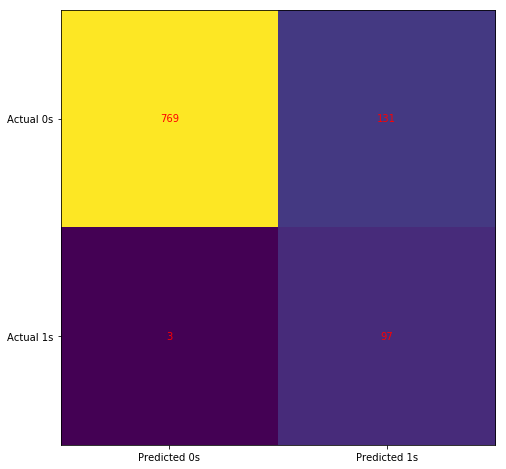

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, model.predict(x).round())

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [79]:
print(lr)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [80]:
# Use score method to get accuracy of model
score = lr.score(X_test, y_test)
print(score)

0.89


# We get predict dataframe for training dataset

In [81]:
data_train_pre = pd.DataFrame({'Default': y_train})
data_train_pre['predict'] = pd.DataFrame({'predict': lr.predict(X_train)}) 
data_train_pre['accuracy'] = data_train_pre['predict'] - data_train_pre['Default']
data_train_pre

,Default,predict,accuracy
105,0,0.0,0.0
68,0,0.0,0.0
479,0,0.0,0.0
399,0,0.0,0.0
434,0,0.0,0.0
...,...,...,...
835,0,NaN,NaN
192,0,0.0,0.0
629,0,0.0,0.0
559,0,0.0,0.0


In [82]:
# set up scoring logic

target_score = 4000
target_odds = 300
pts_double_odds = 400

factor = pts_double_odds / np.log(2)
offset = target_score - factor * np.log(target_odds)

# Score

data_train_pre['score'] = offset + factor * data_train_pre['predict'].values
data_train_pre.describe()




,Default,predict,accuracy,score
count,700.000000,497.000000,497.000000,497.000000
mean,0.088571,0.032193,0.032193,727.050488
std,0.284327,0.176691,0.176691,101.964273
min,0.000000,0.000000,0.000000,708.472524
25%,0.000000,0.000000,0.000000,708.472524
50%,0.000000,0.000000,0.000000,708.472524
75%,0.000000,0.000000,0.000000,708.472524
max,1.000000,1.000000,1.000000,1285.550540


# We get predict dataframe for testing dataset

In [83]:
type(lr.predict(X_test))

numpy.ndarray

In [84]:
print(lr.predict(X_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0]


In [85]:
d = pd.DataFrame()

In [86]:
# set up scoring logic

target_score = 4000
target_odds = 300
pts_double_odds = 400

factor = pts_double_odds / np.log(2)
offset = target_score - factor * np.log(target_odds)

# Score

d['score'] = offset + factor * lr.predict(X_test)
d.describe()


,score
count,300.000000
mean,725.784864
std,98.606617
min,708.472524
25%,708.472524
50%,708.472524
75%,708.472524
max,1285.550540


# Until now, we got all the predict scores for samples in 2014 

# let's see for 'max_recent' variables for detail

In [88]:
x1 = c.max_recent[:, np.newaxis]
len(x1)

1000

In [89]:
y1 = detail.Default
len(y1)

1000

In [90]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

R Squared :  0.1137692479673077
Mean Absolute Error:  0.15952153536588473
Root Mean Squared Error:  0.2824194888511456


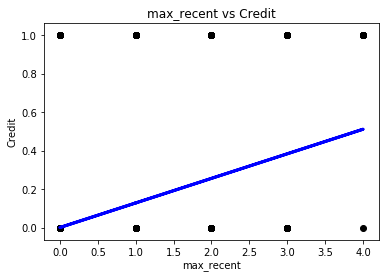

In [91]:


# Create linear regression object
lr = lm.LinearRegression()

# Train the model using the training sets
lr.fit(x1, y1)

# plotting fitted line
plt.scatter(x1, y1,  color='black')
plt.plot(x1, lr.predict(x1), color='blue', linewidth=3)
plt.title('max_recent vs Credit')
plt.ylabel('Credit')
plt.xlabel('max_recent')

# add predict value to the data frame
detail['Default_pred'] = lr.predict(x1)

# Using built-in function
print ("R Squared : ", r2_score(detail.Default, detail.Default_pred))
print ("Mean Absolute Error: ", mean_absolute_error(detail.Default, detail.Default_pred))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(detail.Default, detail.Default_pred)))

In [92]:
y = sorted(detail.Default)

[0.10050048 0.03839163 0.03839163 0.03839163 0.03839163 0.4666763
 0.03839163 0.03839163 0.10050048 0.03839163 0.03839163 0.10050048
 0.03839163 0.03839163 0.03839163 0.03839163 0.10050048 0.03839163
 0.03839163 0.10050048 0.10050048 0.03839163 0.10050048 0.10050048
 0.10050048 0.23819801 0.03839163 0.03839163 0.23819801 0.03839163
 0.03839163 0.03839163 0.03839163 0.03839163 0.03839163 0.10050048
 0.03839163 0.03839163 0.23819801 0.10050048 0.10050048 0.03839163
 0.03839163 0.10050048 0.03839163 0.10050048 0.10050048 0.03839163
 0.23819801 0.10050048 0.03839163 0.03839163 0.03839163 0.03839163
 0.10050048 0.10050048 0.03839163 0.03839163 0.03839163 0.03839163
 0.03839163 0.03839163 0.03839163 0.03839163 0.10050048 0.03839163
 0.03839163 0.10050048 0.10050048 0.10050048 0.03839163 0.10050048
 0.03839163 0.10050048 0.03839163 0.03839163 0.10050048 0.03839163
 0.03839163 0.10050048 0.10050048 0.03839163 0.03839163 0.23819801
 0.03839163 0.10050048 0.03839163 0.03839163 0.03839163 0.03839

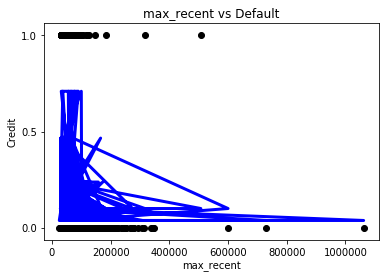

In [93]:
from sklearn.linear_model import LogisticRegression

# manually add intercept
#detail['intercept'] = 1
#independent_variables = [x1.max_recent, 'intercept']

#x1 = detail[independent_variables]       # independent variable
#y = detail['Default']                      # dependent variable 

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(x1, y)

# check the accuracy on the training set
model.score(x1, y)

# predict_proba will return array containing proability of y = 0 and y = 1
print (model.predict_proba(x1)[:,1])

# predict will give convert the probability(y=1) values > .5 to 1 else 0  
print (model.predict(x1))

# plotting fitted line
plt.scatter(detail.Annual_Income, y,  color='black')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(detail.Annual_Income, model.predict_proba(x1)[:,1], color='blue', linewidth=3)
plt.title('max_recent vs Default')
plt.ylabel('Credit')
plt.xlabel('max_recent')
plt.show()

In [94]:
from sklearn import metrics

# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y, model.predict(x1)))
print ("AUC :", metrics.roc_auc_score(y, model.predict_proba(x1)[:,1]))

print ("Confusion matrix :",metrics.confusion_matrix(y, model.predict(x1)))
print ("classification report :", metrics.classification_report(y, model.predict(x1)))

Accuracy : 0.906
AUC : 0.7448777777777777
Confusion matrix : [[899   1]
 [ 93   7]]
classification report :               precision    recall  f1-score   support

           0       0.91      1.00      0.95       900
           1       0.88      0.07      0.13       100

    accuracy                           0.91      1000
   macro avg       0.89      0.53      0.54      1000
weighted avg       0.90      0.91      0.87      1000



ROC AUC: 0.74


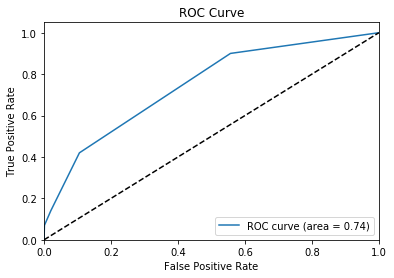

In [95]:
# Determine the false positive and true positive rates
fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(x1)[:,1])
 
# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# ROC curve = .74, it shows thethold around (0.4, 0.8) might be better for predict when we consider max bad credit in recent 3 months.

# File line 

C = 1 (default), Accuracy : 0.906
C = 10, Accuracy : 0.906
C = 100, Accuracy : 0.906
C = 1000, Accuracy : 0.906


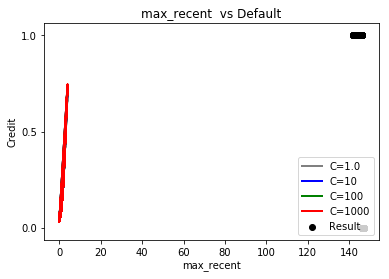

In [97]:
# instantiate a logistic regression model with default c value, and fit with X and y
model = LogisticRegression()
model = model.fit(x1, y)

# check the accuracy on the training set
print ("C = 1 (default), Accuracy :", metrics.accuracy_score(y, model.predict(x1)))

# instantiate a logistic regression model with c = 10, and fit with X and y
model1 = LogisticRegression(C=10)
model1 = model1.fit(x1, y)

# check the accuracy on the training set
print ("C = 10, Accuracy :", metrics.accuracy_score(y, model1.predict(x1)))

# instantiate a logistic regression model with c = 100, and fit with X and y
model2 = LogisticRegression(C=100)
model2 = model2.fit(x1, y)

# check the accuracy on the training set
print ("C = 100, Accuracy :", metrics.accuracy_score(y, model2.predict(x1)))

# instantiate a logistic regression model with c = 1000, and fit with X and y
model3 = LogisticRegression(C=1000)
model3 = model3.fit(x1, y)

# check the accuracy on the training set
print ("C = 1000, Accuracy :", metrics.accuracy_score(y, model3.predict(x1)))


# plotting fitted line
plt.scatter(detail.Month_On_Book, y,  color='black', label='Result')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(c.max_recent, model.predict_proba(x1)[:,1], color='gray', linewidth=2, label='C=1.0')
plt.plot(c.max_recent, model1.predict_proba(x1)[:,1], color='blue', linewidth=2,label='C=10')
plt.plot(c.max_recent, model2.predict_proba(x1)[:,1], color='green', linewidth=2,label='C=100')
plt.plot(c.max_recent, model3.predict_proba(x1)[:,1], color='red', linewidth=2,label='C=1000')
plt.legend(loc='lower right') # legend location
plt.title('max_recent  vs Default')
plt.ylabel('Credit')
plt.xlabel('max_recent')
plt.show()

# F1-score is better for 'good' credit but not for 'bad' credit person. 

# In summary, Multiple variables Logistic regression model predicts good for 'good' credit sample but not so good for 'bad' samples. 

# Private informations like age, annual income, most recent 3 months credit, and months booked in bank is statistically significant to predict 2014's credit. 